In [1]:
# -*- coding: utf-8 -*-
#-*- coding: cp950 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from typing import *

import torch
import torch.optim as optim

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os

from fastai import *
from fastai.vision import *
from fastai.text import *
from fastai.callbacks import *
from fastai.core import *

In [4]:
#在colab下接入google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
base_dir = '/content/gdrive/MyDrive'
#path = Path(base_dir +'/imgs4')  #imgs
path = Path(base_dir +'/extract features')
# path.mkdir(parents=True,exist_ok=True)
os.chdir(path)

Mounted at /content/gdrive


In [5]:
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import cv2

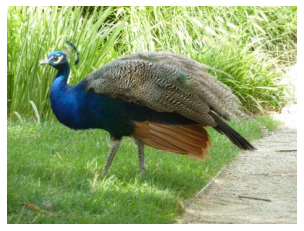

In [6]:
# display the image
img_disp = cv2.imread('./Img/peacock.jpg')  ######@
img_disp = cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB)
plt.imshow(img_disp)
plt.axis("off")  
plt.show()

In [7]:
#Classify ImageNet classes with ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = './Img/peacock.jpg'   ###
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n01806143', 'peacock', 0.99992645), ('n02017213', 'European_gallinule', 2.5913801e-05), ('n01795545', 'black_grouse', 2.3591658e-05)]


In [8]:
#Extract features with VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

#model = VGG16(weights='imagenet', include_top=False)
model = ResNet50(weights='imagenet', include_top=False)

img_path = './Img/elephant.jpg' #######
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
features

94773248/94765736 [==============================] - 1s 0us/step


array([[[[ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ]],

        [[ 0.      ,  0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.      ],
         [ 0.      ,  2.997171,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ,  0.673119],
         [ 0.      ,  6.158061,  0.      ,  0.      , ...,  0.

In [9]:
print("Feature vector dimensions: ",features.shape)

Feature vector dimensions:  (1, 7, 7, 2048)


In [10]:
type(features)

numpy.ndarray

In [11]:
pd.DataFrame(features)

ValueError: ignored